In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/word2vec-google/GoogleNews-vectors-negative300.bin
/kaggle/input/trainings/adult.csv
/kaggle/input/trainings/narendramodi_tweets.csv
/kaggle/input/trainings/employees_attrition.csv
/kaggle/input/trainings/naukri_jobs_datascience.csv
/kaggle/input/trainings/restaurant_reviews.csv
/kaggle/input/trainings/insurance.csv
/kaggle/input/trainings/odi-batting.csv
/kaggle/input/trainings/amazon_reviews_big.csv
/kaggle/input/trainings/bank-full.csv
/kaggle/input/trainings/sales_store_data.csv
/kaggle/input/trainings/IMDB Dataset.csv
/kaggle/input/trainings/sales_data.csv
/kaggle/input/trainings/Advertising.csv
/kaggle/input/trainings/Reviews/Reviews.csv


## Word2vec
- https://arxiv.org/pdf/1301.3781.pdf
- https://arxiv.org/pdf/1310.4546.pdf
- https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

#### Download pre-trained vectors from google (for google colab)

In [ ]:
!wget -P /root/input -c "https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g"

### For kaggle, add data from kaggle datasets

In [3]:
from gensim.models import KeyedVectors, Word2Vec
embeddings = KeyedVectors.load_word2vec_format('/kaggle/input/word2vec-google/GoogleNews-vectors-negative300.bin',
                                              binary=True)

In [11]:
len(embeddings)

3000000

In [22]:
# embeddings.wv.vocab
words = embeddings.key_to_index
'obama' in embeddings

True

In [26]:
words = ['king', 'man', 'woman']
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
print(cosine_similarity([embeddings['king'], embeddings['woman']])[0][1])
print(cosine_similarity([embeddings['king'], embeddings['man']])[0][1])

0.12847976
0.22942667


In [35]:
v1 = embeddings['king']
v2 = embeddings['man']
v3 = embeddings['woman']
# king - man + woman = queen
v = v1 - v2 + v3
#v

In [36]:
# among all the word's vector, find out the vector which is very close to v

In [41]:
embeddings.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]

In [43]:
len(embeddings['king'])

300

### Sentiment analysis using word embeddings

In [23]:
reviews = pd.read_csv('/kaggle/input/trainings/IMDB Dataset.csv').sample(5000)
reviews['sentiment'] = reviews['sentiment'].replace({'negative': 0, 'positive': 1}).astype(int)
print(reviews.shape)
reviews.head()

(5000, 2)


,review,sentiment
15128,There are places for political commentary in f...,0
24516,"2003 was seen as the year of the Matrix, with ...",1
30213,Being a Film studies graduate I would like to ...,0
13044,I do not even want to call this thing a film -...,0
26692,"I thought that this film was very well made, H...",1


In [95]:
reviews.iloc[10]['review']

'Story about three eclipse (maybe even Indigo, ha) children beginning their love for murder. Oh, and the people who are "hot" on their trail.<br /><br />Bloody Birthday, a pretty mediocre title for the film, was a nice lil surprise. I was in no way expecting a film that dealt with blood-thirsty psychopath kids. And I may say it\'s also one of the best flicks I\'ve seen with kids as the villains. By the end of the movie I seriously wanted these kids to die in horrible fashion.<br /><br />It\'s a really solid 80s horror flick, but how these kids are getting away with all this mayhem and murder is just something that you can\'t not think about. Even the slightest bit of investigation would easily uncover these lil sh!ts as the murderers. But there seems to be only a couple police in town, well by the end, only one, and he seemed like a dimwit, so I suppose they could have gotten away with it. Haha, yeah, and I\'m a Chinese jet-pilot.<br /><br />Nevertheless, this movie delivered some evil

In [51]:
docs = reviews['review'].str.replace('<br />', '')
docs = docs.str.replace("n't", ' not').str.replace('[^a-zA-Z\s\.]', '')
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(docs, reviews['sentiment'],
                                                   test_size=0.2, random_state=1)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [50]:
reviews['review'].iloc[10]

'This movie is nothing more than Christian propaganda. It started off like a good sci-fi movie and then works a syrupy sweet Christian theme into the story which is totally unrelated. I had to turn it off half way through because I felt tricked into renting it. The catholic church has officially announced that aliens do NOT contradict belief in God.<br /><br />The movie is slightly entertaining despite this but the dialog is unbelievable, writing and acting is mostly rubbish and all in all, this movie is mostly a stinker to be avoided.<br /><br />There was obviously some research done into the phenomenon by the filmmakers, but then you quickly realize that it is only for the purpose to debunk and inject their own paranoid religious views into a valid interesting subject. If you are a zealous religious fanatic who believes in demons and angels , you will love this movie.'

In [107]:
docs.iloc[10]

'Story about three eclipse maybe even Indigo ha children beginning their love for murder. Oh and the people who are hot on their trail.Bloody Birthday a pretty mediocre title for the film was a nice lil surprise. I was in no way expecting a film that dealt with bloodthirsty psychopath kids. And I may say its also one of the best flicks Ive seen with kids as the villains. By the end of the movie I seriously wanted these kids to die in horrible fashion.Its a really solid s horror flick but how these kids are getting away with all this mayhem and murder is just something that you cant not think about. Even the slightest bit of investigation would easily uncover these lil shts as the murderers. But there seems to be only a couple police in town well by the end only one and he seemed like a dimwit so I suppose they could have gotten away with it. Haha yeah and Im a Chinese jetpilot.Nevertheless this movie delivered some evilass kids who were more than entertaining a lot of premarital sex an

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [59]:
train_x.iloc[0][:200]

'Im sure that not many people outside of Australia have ever heard of the legend of Ned Kelly I once saw a documentary about the man but thats the only time I once saw or heard anything about him And I'

In [64]:
tokenizer.word_index['that']

11

In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x)
vocab_size = len(tokenizer.word_index) + 1
train_x_seq = tokenizer.texts_to_sequences(train_x)
test_x_seq = tokenizer.texts_to_sequences(test_x)



<AxesSubplot:>

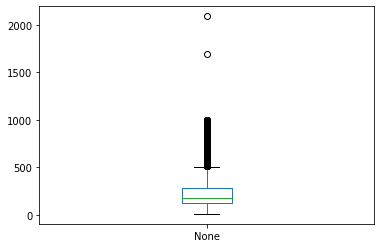

In [27]:
docs_size = []
for doc in train_x_seq:
    docs_size.append(len(doc))
pd.Series(docs_size).plot.box()

In [53]:
maxlen = max(docs_size)
train_x_padded = pad_sequences(train_x_seq, padding='post', maxlen=maxlen)
test_x_padded = pad_sequences(test_x_seq, padding='post', maxlen=maxlen)

In [81]:
vocab_size

44383

In [83]:
#tokenizer.word_index

In [54]:
subset_embedding_matrix = np.zeros((vocab_size, 300))
words_available = []
words_not_available = []

for word, wid in tokenizer.word_index.items():
    if word in embeddings:
        subset_embedding_matrix[wid] = embeddings[word]
        words_available.append(word)
    else:
        words_not_available.append(word)

In [55]:
len(words_not_available) / vocab_size * 100

31.74238067855089

In [56]:
words_not_available

['a',
 'and',
 'of',
 'to',
 'humour',
 'theatre',
 'welles',
 'favourite',
 'keaton',
 'tarzan',
 'bmovie',
 'overthetop',
 'colour',
 'hitchcock',
 'seagal',
 'columbo',
 'kolchak',
 'fonda',
 'rockne',
 'lowbudget',
 'streisand',
 'gere',
 'realise',
 'wwii',
 'grey',
 'spielberg',
 'writerdirector',
 'mstk',
 'mustsee',
 'streep',
 'fulci',
 'matthau',
 'walken',
 'glenda',
 'carell',
 'orson',
 'ritter',
 'barbra',
 'kornbluth',
 'sarandon',
 'carrey',
 'barrymore',
 'bettie',
 'hayworth',
 'pacino',
 'cagney',
 'voight',
 'gamera',
 'axe',
 'behaviour',
 'quaid',
 'aztec',
 'onedimensional',
 'eastwood',
 'thoughtprovoking',
 'troma',
 'lemmon',
 'argento',
 'cusack',
 'brando',
 'paxton',
 'lucille',
 'whoopi',
 'macbeth',
 'beowulf',
 'icarly',
 'hitchcocks',
 'jacksons',
 'pavarotti',
 'hartley',
 'favour',
 'bergmans',
 'centre',
 'waynes',
 'dario',
 'brosnan',
 'loretta',
 'melville',
 'beethoven',
 'jacobi',
 'haines',
 'obrien',
 'firstrate',
 'flynn',
 'henson',
 'rowlan

In [137]:
from tensorflow.keras import layers
from keras.models import Sequential

In [152]:
embedding_dim = 300
model = Sequential()
# trainable=False, if you have weight matrix already
model.add(layers.Embedding(vocab_size, embedding_dim,
                          weights = [subset_embedding_matrix],
                          input_length=maxlen,
                          trainable=False))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [153]:
history = model.fit(train_x_padded, train_y, epochs=15, verbose=1)

Epoch 1/15
125/125 [==============================] - 7s 53ms/step - loss: 0.6934 - accuracy: 0.4968
Epoch 2/15
125/125 [==============================] - 6s 51ms/step - loss: 0.6930 - accuracy: 0.5129
Epoch 3/15
125/125 [==============================] - 7s 55ms/step - loss: 0.6924 - accuracy: 0.5253
Epoch 4/15
125/125 [==============================] - 7s 53ms/step - loss: 0.6931 - accuracy: 0.5078
Epoch 5/15
125/125 [==============================] - 6s 52ms/step - loss: 0.6934 - accuracy: 0.5009
Epoch 6/15
125/125 [==============================] - 6s 52ms/step - loss: 0.6931 - accuracy: 0.5087
Epoch 7/15
125/125 [==============================] - 7s 52ms/step - loss: 0.6937 - accuracy: 0.4963
Epoch 8/15
125/125 [==============================] - 7s 54ms/step - loss: 0.6928 - accuracy: 0.5139
Epoch 9/15
125/125 [==============================] - 7s 52ms/step - loss: 0.6929 - accuracy: 0.5127
Epoch 10/15
125/125 [==============================] - 7s 52ms/step - loss: 0.6932 - accura

In [151]:
loss = model.evaluate(test_x_padded, test_y)

32/32 [==============================] - 1s 30ms/step - loss: 0.6927 - accuracy: 0.5150


### Exercise

In [4]:
v1 = embeddings['king']
v2 = embeddings['man']
v3 = embeddings['woman']
# king - man + woman = queen
v = v1 - v2 + v3
# among all the word's vector, find out the vector which is very close to v

2. Quora insincere questions competition
    - Google word embedding
    - Glove
    - Wiki word embedding
- Identify percentage of words available for each of the above word embeddings
- For the embeddings which has highest percentage of words available, construct the word embedding matrix
- Build a classifier using keras and use the embeddings

### Increasing the availability of word

In [7]:
!wget -P . -c "https://fh295.github.io/SimLex-999.zip"

--2021-07-05 09:51:55--  https://fh295.github.io/SimLex-999.zip
Resolving fh295.github.io (fh295.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to fh295.github.io (fh295.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16805 (16K) [application/zip]
Saving to: ‘./SimLex-999.zip’

SimLex-999.zip      100%[===================>]  16.41K  --.-KB/s    in 0s      

2021-07-05 09:51:55 (77.0 MB/s) - ‘./SimLex-999.zip’ saved [16805/16805]



In [14]:
import zipfile
zf = zipfile.ZipFile(r'./SimLex-999.zip')
sim = pd.read_csv(zf.open('SimLex-999/SimLex-999.txt'), sep="\t")

In [20]:
all_words = list(set(list(set(sim['word1'])) + list(set(sim['word2']))))
word1_2 = sim.set_index('word1')['word2'].to_dict()
word2_1 = sim.set_index('word2')['word1'].to_dict()

In [31]:
subset_embedding_matrix = np.zeros((vocab_size, 300))
words_available = []
words_not_available = []
for word, wid in tokenizer.word_index.items():
    if word in embeddings:
        subset_embedding_matrix[wid] = embeddings[word]
        words_available.append(word)
    elif word in word1_2:
        if word1_2[word] in embeddings:
            subset_embedding_matrix[wid] = embeddings[word]
            words_available.append(word)
    elif word in word2_1:
        if word2_1[word] in embeddings:
            subset_embedding_matrix[wid] = embeddings[word]
            words_available.append(word)        
    else:
        words_not_available.append(word)

In [32]:
len(words_not_available) / vocab_size * 100

31.742495028630298

In [35]:
'old' in word1_2

True

In [37]:
for word in words_not_available:
    if word in word2_1:
        print(word, word1_2[word])

In [48]:
import re
x = "doesn't"
re.sub("(.*)n't", x, '')

''

In [38]:
words_not_available

['a',
 'and',
 'of',
 'to',
 'doesnt',
 'didnt',
 'isnt',
 'wasnt',
 'humour',
 'hasnt',
 'theatre',
 'welles',
 'favourite',
 'keaton',
 'tarzan',
 'aint',
 'bmovie',
 'overthetop',
 'colour',
 'hitchcock',
 'seagal',
 'columbo',
 'kolchak',
 'fonda',
 'rockne',
 'lowbudget',
 'streisand',
 'gere',
 'realise',
 'wwii',
 'grey',
 'spielberg',
 'writerdirector',
 'mstk',
 'mustsee',
 'streep',
 'fulci',
 'matthau',
 'walken',
 'glenda',
 'carell',
 'orson',
 'ritter',
 'barbra',
 'kornbluth',
 'sarandon',
 'carrey',
 'barrymore',
 'bettie',
 'hayworth',
 'pacino',
 'cagney',
 'voight',
 'gamera',
 'axe',
 'behaviour',
 'quaid',
 'aztec',
 'onedimensional',
 'eastwood',
 'thoughtprovoking',
 'troma',
 'lemmon',
 'argento',
 'cusack',
 'brando',
 'paxton',
 'lucille',
 'whoopi',
 'macbeth',
 'beowulf',
 'icarly',
 'hitchcocks',
 'jacksons',
 'pavarotti',
 'hartley',
 'favour',
 'bergmans',
 'centre',
 'waynes',
 'dario',
 'brosnan',
 'loretta',
 'melville',
 'beethoven',
 'jacobi',
 'hain